In [1]:
#필요한 라이브러리 및 google drive에서 train, test데이터 불러오기
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

#한글 폰트 지정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [2]:
#train 데이터 확인
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [3]:
#test 데이터 확인
test.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [4]:
#train 데이터 정보 확인
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


In [5]:
#test 데이터 정보 확인
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        846 non-null    object 
 1   제조사       846 non-null    object 
 2   모델        846 non-null    object 
 3   차량상태      846 non-null    object 
 4   배터리용량     542 non-null    float64
 5   구동방식      846 non-null    object 
 6   주행거리(km)  846 non-null    int64  
 7   보증기간(년)   846 non-null    int64  
 8   사고이력      846 non-null    object 
 9   연식(년)     846 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 66.2+ KB


,배터리용량,주행거리(km),보증기간(년),연식(년)
count,542.000000,846.000000,846.000000,846.000000
mean,69.712963,44664.152482,5.027187,0.206856
std,15.078398,55518.084064,3.157479,0.544798
min,46.000000,2.000000,0.000000,0.000000
25%,56.623000,6156.500000,2.000000,0.000000
50%,68.479000,17254.000000,5.000000,0.000000
75%,78.035250,60141.250000,8.000000,0.000000
max,99.800000,199948.000000,10.000000,2.000000


##EDA - train

#1. 제조사

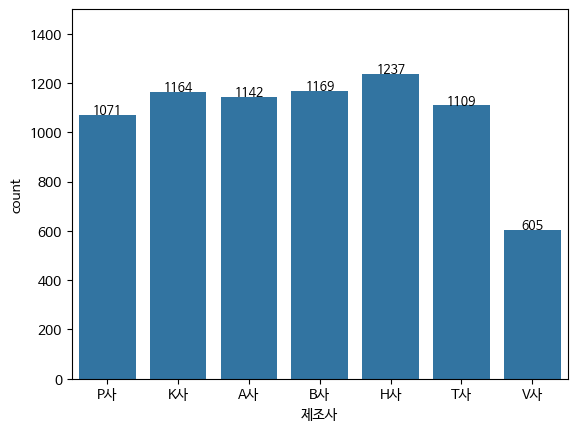

In [6]:
#제조사별 데이터 수 확인(countplot 사용)
ax = sns.countplot(x = '제조사',data = train)

#그래프 위 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha = 'center', size = 9)
ax.set_ylim(0, 1500)
plt.show()

#2. 모델

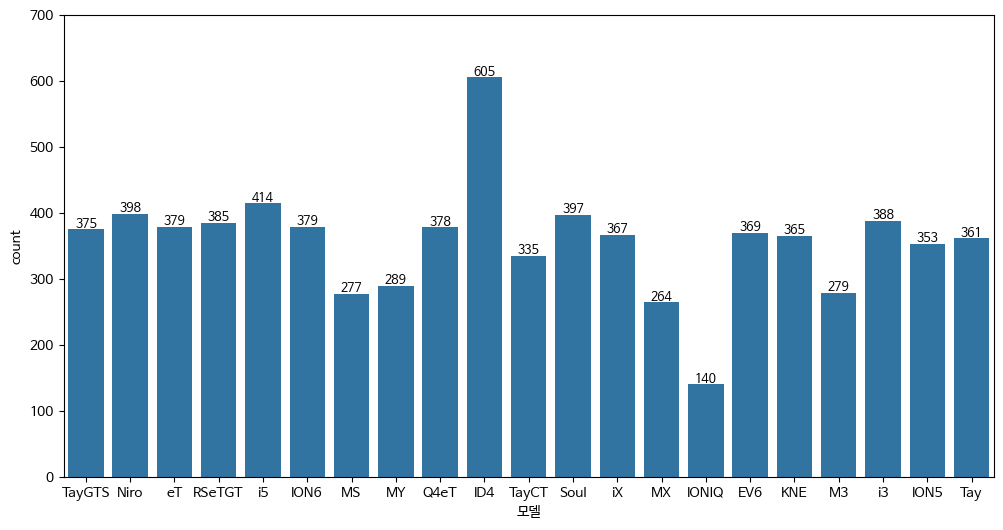

In [7]:
#모델별 데이터 수 확인(countplot 사용)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = '모델',data = train)

#그래프 위 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha = 'center', size = 9)
ax.set_ylim(0, 700)
plt.show()

#3. 차량상태

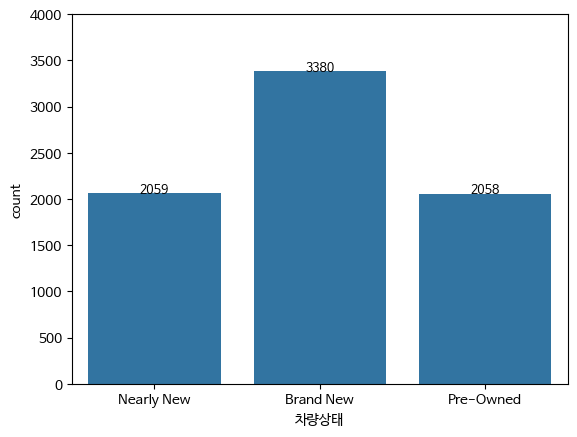

In [8]:
#차량상태별 데이터 수 확인(countplot 사용)
ax = sns.countplot(x = '차량상태',data = train)

#그래프 위 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha = 'center', size = 9)
ax.set_ylim(0, 4000)
plt.show()

#4. 배터리용량

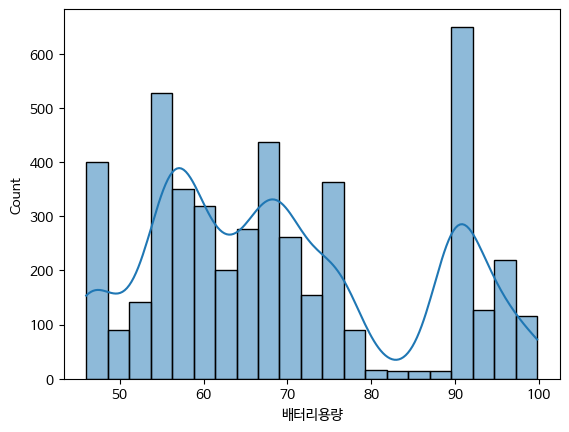

In [9]:
#배터리용량 분포도 확인
sns.histplot(train['배터리용량'], kde = True)
plt.show()

#5. 구동방식

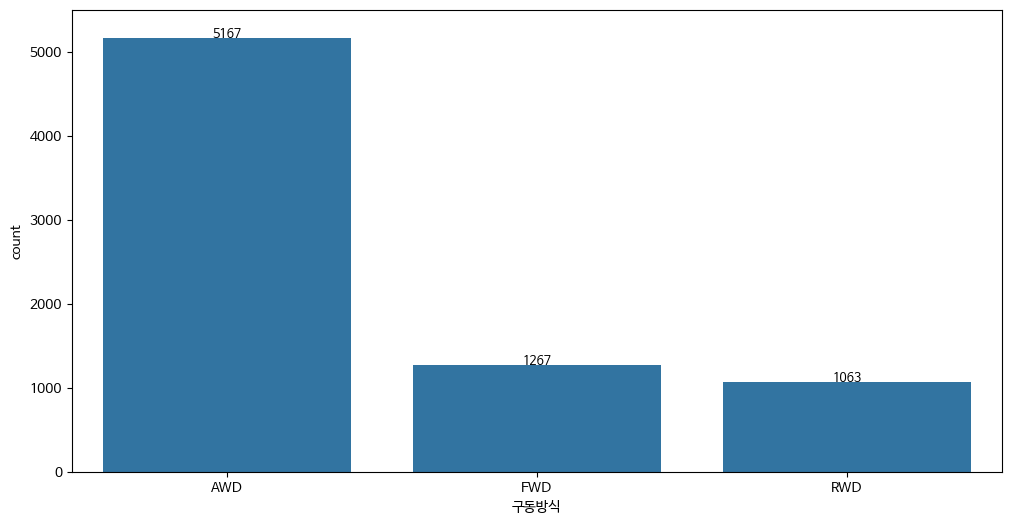

In [10]:
#구동방식별 데이터 수 확인(countplot 사용)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = '구동방식',data = train)

#그래프 위 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha = 'center', size = 9)
ax.set_ylim(0, 5500)
plt.show()

#6. 주행거리

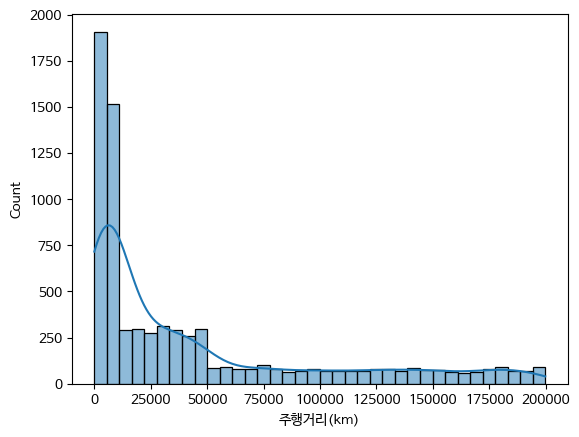

In [11]:
#주행거리 분포도 확인
sns.histplot(train['주행거리(km)'], kde = True)
plt.show()

#7. 보증기간

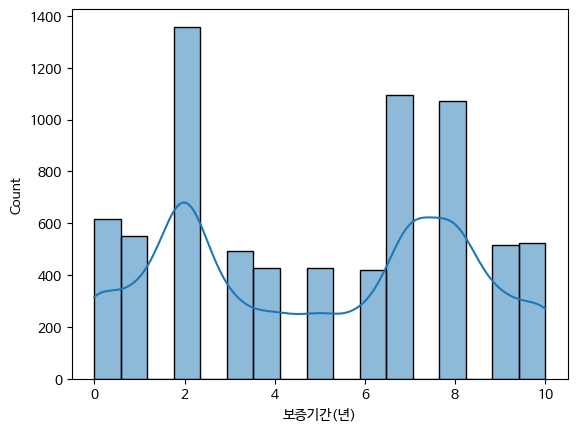

In [12]:
#보증기간 분포도 확인
sns.histplot(train['보증기간(년)'], kde = True)
plt.show()

#8. 사고이력

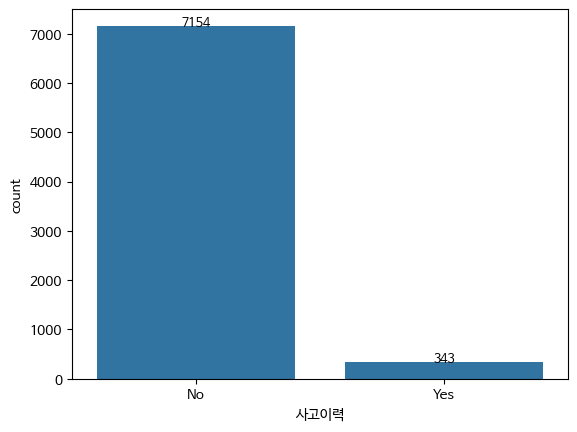

In [13]:
#사고이력별 데이터 수 확인(countplot 사용)
ax = sns.countplot(x = '사고이력',data = train)

#그래프 위 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha = 'center', size = 9)
ax.set_ylim(0, 7500)
plt.show()

#9. 연식

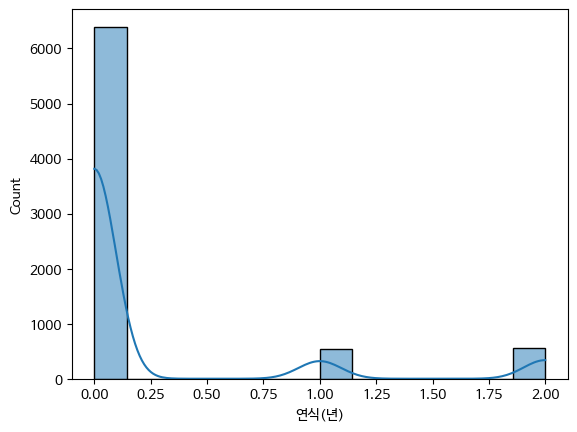

In [14]:
#연식 분포도 확인
sns.histplot(train['연식(년)'], kde = True)
plt.show()

##이상치, 결측치 파악

(1) 이상치 파악


In [15]:
def IQRsum(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return ((column < lower_bound) | (column > upper_bound)).sum()

quantitative_cols = ['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)','가격(백만원)']
outliers = train[quantitative_cols].apply(lambda column: IQRsum(column))

print('column별 이상치 개수')
print(outliers)

column별 이상치 개수
배터리용량          0
주행거리(km)     726
보증기간(년)        0
연식(년)       1102
가격(백만원)      375
dtype: int64


(2) 결측치 파악

In [16]:
train.isnull().sum()

,0
ID,0
제조사,0
모델,0
차량상태,0
배터리용량,2711
구동방식,0
주행거리(km),0
보증기간(년),0
사고이력,0
연식(년),0


## 상관관계 확인

(1) 수치형 데이터들간의 상관관계 확인

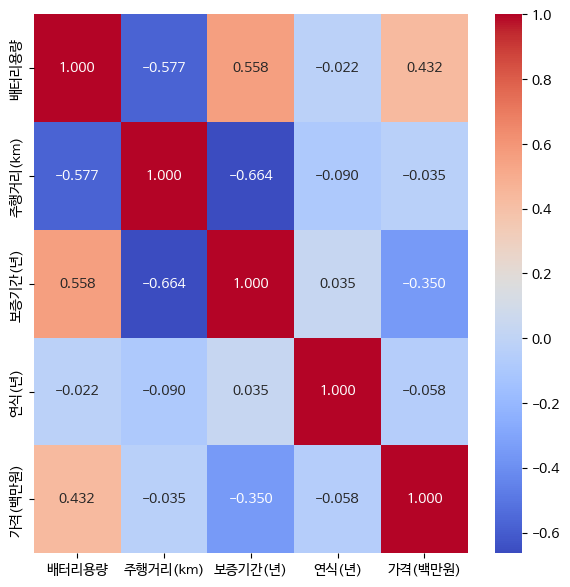

In [17]:
# 상관관계 계산
correlations = train[['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)', '가격(백만원)']].corr()

# 히트맵 생성
plt.figure(figsize=(7, 7))  # 히트맵 크기 설정
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

In [18]:
# train 데이터 내 수치형 데이터인 column 선택
data = train[['가격(백만원)', '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)']]

# 상관관계 계산
correlations = data.corr()

# 상관계수 출력
print(correlations['가격(백만원)'])

가격(백만원)     1.000000
배터리용량       0.431668
주행거리(km)   -0.035488
보증기간(년)    -0.349962
연식(년)      -0.058455
Name: 가격(백만원), dtype: float64


'연식'과 '주행거리'는 가격과의 상관계수의 절댓값이 0.1 미만으로 상관관계가 거의 없다. '보증기간'과 '배터리용량'은 가격과의 상관계수의 절댓값이 0.3이상 0.7미만으로 뚜렷한 상관관계를 보임을 알 수 있다.

(1-1) 보증기간과 가격

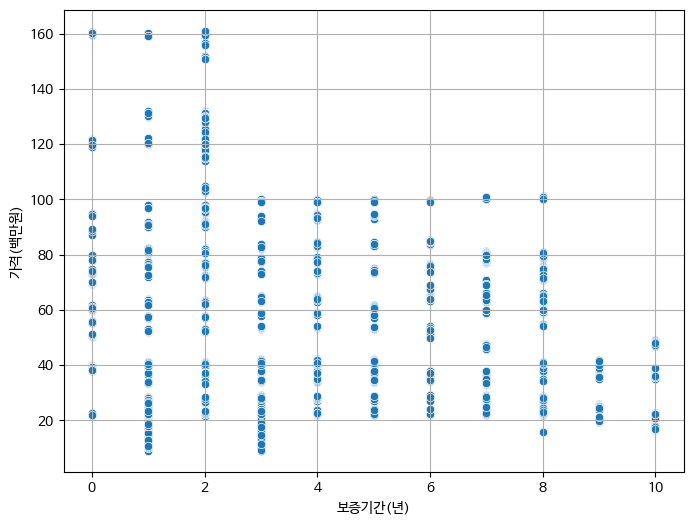

In [19]:
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.scatterplot(x='보증기간(년)', y='가격(백만원)', data=train)
plt.grid()
plt.xlabel('보증기간(년)')  # x축 레이블
plt.ylabel('가격(백만원)')  # y축 레이블
plt.show()

(1-2) 배터리용량과 가격

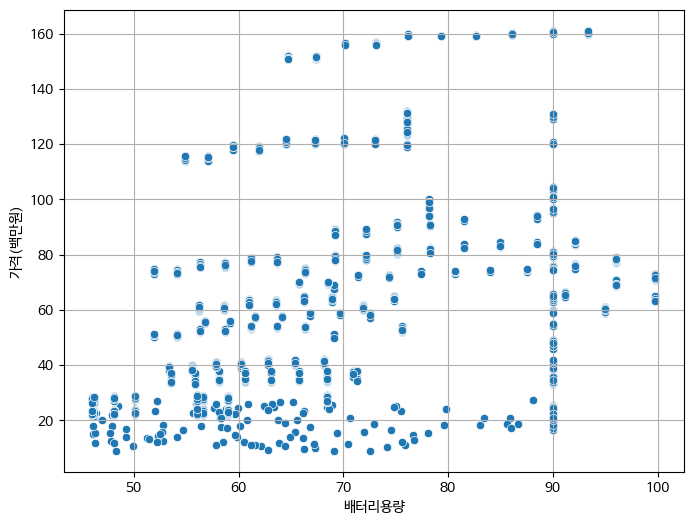

In [20]:
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.scatterplot(x='배터리용량', y='가격(백만원)', data=train)
plt.xlabel('배터리용량')  # x축 레이블
plt.ylabel('가격(백만원)')  # y축 레이블
plt.grid()
plt.show()

(2) 범주형 데이터들과 가격(백만원) 컬럼간의 상관관계 확인

(2-1) '차량상태'와 '가격(백만원)'간의 상관관계 확인

In [21]:
# '차량상태' 컬럼을 더미 변수로 변환
dummy_variables = pd.get_dummies(train['차량상태'])

# 원본 데이터프레임에 더미 변수 추가
train = pd.concat([train, dummy_variables], axis=1)

# '가격(백만원)' 컬럼과 더미 변수 간의 상관관계 계산
correlations = train[['가격(백만원)'] + list(dummy_variables.columns)].corr()

# 상관관계 출력
print(correlations['가격(백만원)'])

가격(백만원)       1.000000
Brand New     0.068253
Nearly New   -0.030800
Pre-Owned    -0.045296
Name: 가격(백만원), dtype: float64


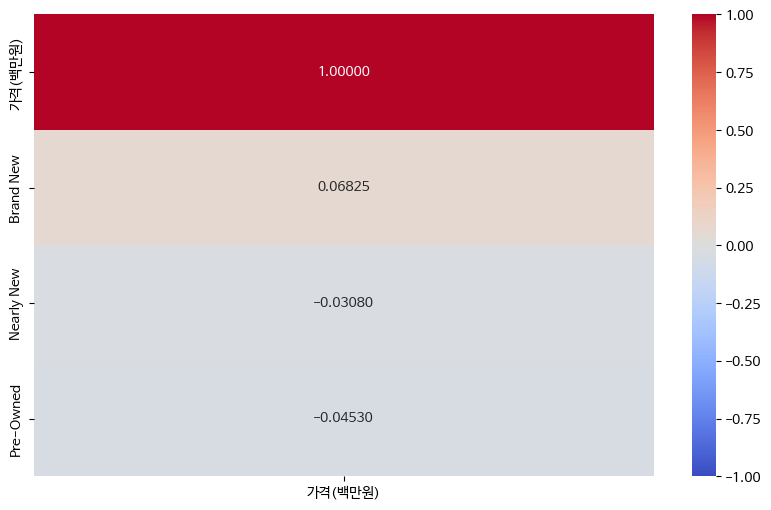

In [22]:
# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlations[['가격(백만원)']].sort_values(by=['가격(백만원)'], ascending=False),
            annot=True, cmap='coolwarm', fmt=".5f", vmin=-1, vmax=1)
plt.show()

(2-2) '제조사'와 '가격(백만원)'간의 상관관계 확인

In [23]:
# '제조사' 컬럼을 더미 변수로 변환
dummy_variables = pd.get_dummies(train['제조사'])

# 원본 데이터프레임에 더미 변수 추가
train = pd.concat([train, dummy_variables], axis=1)

# '가격(백만원)' 컬럼과 더미 변수 간의 상관관계 계산
correlations = train[['가격(백만원)'] + list(dummy_variables.columns)].corr()

# 상관관계 출력
print(correlations['가격(백만원)'])

가격(백만원)    1.000000
A사         0.148032
B사        -0.083507
H사        -0.376286
K사        -0.369152
P사         0.776059
T사         0.088937
V사        -0.193403
Name: 가격(백만원), dtype: float64


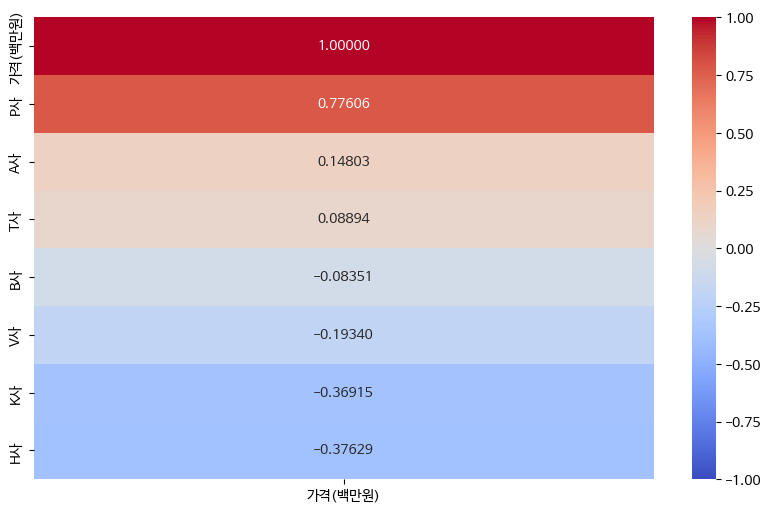

In [24]:
# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlations[['가격(백만원)']].sort_values(by=['가격(백만원)'], ascending=False),
            annot=True, cmap='coolwarm', fmt=".5f", vmin=-1, vmax=1)
plt.show()

(2-3) '모델'과 '가격(백만원)'간의 상관관계 확인

In [25]:
# '모델' 컬럼을 더미 변수로 변환
dummy_variables = pd.get_dummies(train['모델'])

# 원본 데이터프레임에 더미 변수 추가
train = pd.concat([train, dummy_variables], axis=1)

# '가격(백만원)' 컬럼과 더미 변수 간의 상관관계 계산
correlations = train[['가격(백만원)'] + list(dummy_variables.columns)].corr()

# 상관관계 출력
print(correlations['가격(백만원)'])

가격(백만원)    1.000000
EV6       -0.112566
ID4       -0.193403
ION5      -0.165373
ION6      -0.152558
IONIQ     -0.166920
KNE       -0.225923
M3        -0.057403
MS         0.065245
MX         0.107992
MY         0.053128
Niro      -0.228488
Q4eT      -0.026808
RSeTGT     0.231555
Soul      -0.259485
Tay        0.292165
TayCT      0.377614
TayGTS     0.600937
eT         0.036292
i3        -0.247178
i5         0.003572
iX         0.109590
Name: 가격(백만원), dtype: float64


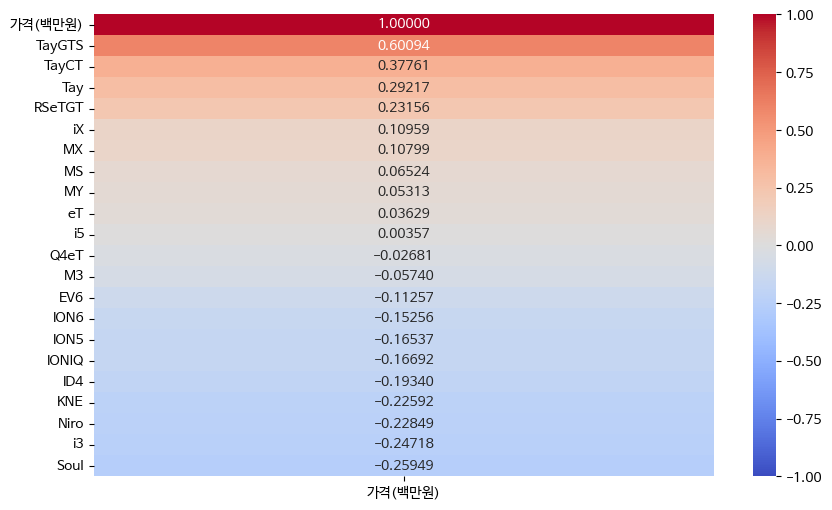

In [26]:
# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlations[['가격(백만원)']].sort_values(by=['가격(백만원)'], ascending=False),
            annot=True, cmap='coolwarm', fmt=".5f", vmin=-1, vmax=1)
plt.show()

(2-4) '구동방식'과 '가격(백만원)'간의 상관관계 확인

In [27]:
# '구동방식' 컬럼을 더미 변수로 변환
dummy_variables = pd.get_dummies(train['구동방식'])

# 원본 데이터프레임에 더미 변수 추가
train = pd.concat([train, dummy_variables], axis=1)

# '가격(백만원)' 컬럼과 더미 변수 간의 상관관계 계산
correlations = train[['가격(백만원)'] + list(dummy_variables.columns)].corr()

# 상관관계 출력
print(correlations['가격(백만원)'])

가격(백만원)    1.000000
AWD        0.404816
FWD       -0.421124
RWD       -0.084678
Name: 가격(백만원), dtype: float64


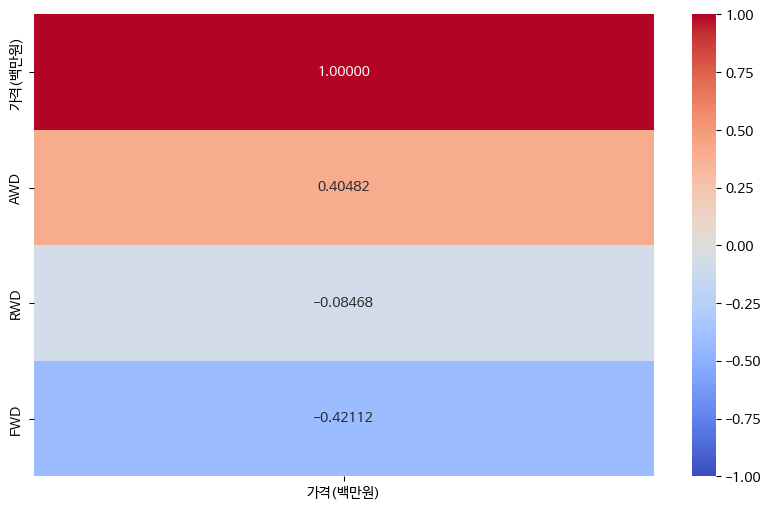

In [28]:
# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlations[['가격(백만원)']].sort_values(by=['가격(백만원)'], ascending=False),
            annot=True, cmap='coolwarm', fmt=".5f", vmin=-1, vmax=1)
plt.show()

(2-5) '사고이력'과 '가격(백만원)'간의 상관관계 확인

In [29]:
# '사고이력' 컬럼을 더미 변수로 변환
dummy_variables = pd.get_dummies(train['사고이력'])

# 원본 데이터프레임에 더미 변수 추가
train = pd.concat([train, dummy_variables], axis=1)

# '가격(백만원)' 컬럼과 더미 변수 간의 상관관계 계산
correlations = train[['가격(백만원)'] + list(dummy_variables.columns)].corr()

# 상관관계 출력
print(correlations['가격(백만원)'])

가격(백만원)    1.000000
No        -0.004627
Yes        0.004627
Name: 가격(백만원), dtype: float64


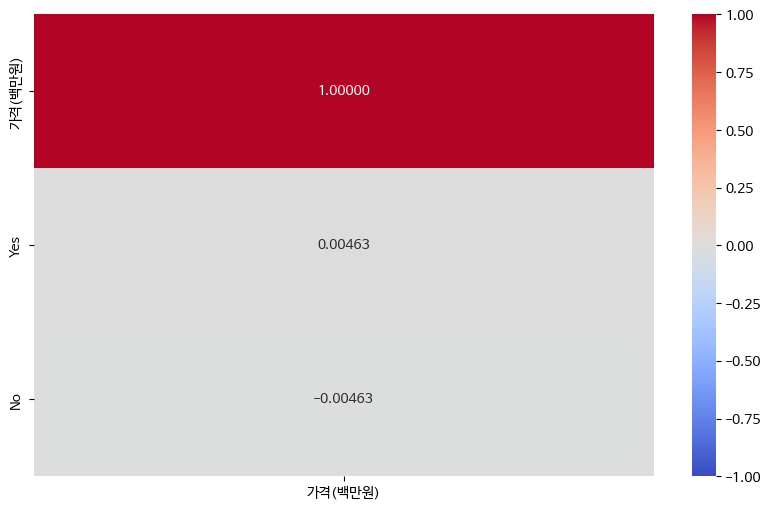

In [30]:
# 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlations[['가격(백만원)']].sort_values(by=['가격(백만원)'], ascending=False),
            annot=True, cmap='coolwarm', fmt=".5f", vmin=-1, vmax=1)
plt.show()